# Busiess objective

# Data Description

### Import crucial libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change the directory into directory where the data is stored
os.chdir(r'C:\Users\SUBRAHMANYAM\OneDrive\Desktop\casestudy3')
# List all the files in current directory
list(os.listdir())

['batch 05 document.docx',
 'Car Price Prediction using Linear Regression (1).docx',
 'case study module 3 problem statement.pdf',
 'Data Sets-20220427.zip',
 'LinearRegressionModel.pkl',
 '_Dataset.csv']

In [3]:
# Read the data by using pandas module
data = pd.read_csv('_Dataset.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Shape of the data
data.shape

(8128, 13)

In [5]:
# All columns in the data
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
# Removing unwanted records
data.drop(labels=['name', 'torque'], axis=1, inplace=True)

In [7]:
# sperating units of mileage into seperate column
data[['mileage', 'units']] = data['mileage'].str.split(pat=' ', expand=True)

In [8]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
 11  units          7907 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [9]:
# Convert the feature(s) which are read in incorrect format to correct format
data['mileage'] = pd.to_numeric(data['mileage'], downcast='integer')

In [10]:
data['units'].value_counts()

kmpl     7819
km/kg      88
Name: units, dtype: int64

In [11]:
# converting all units into same unit
data['mileage_in_kmpl'] = np.where(data['units']=='km/kg', data['mileage']*1.40, data['mileage'])

In [12]:
# Removing unwanted records
data.drop(labels=['units', 'mileage'], axis = 1, inplace=True)

In [13]:
# checking data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8128 non-null   int64  
 1   selling_price    8128 non-null   int64  
 2   km_driven        8128 non-null   int64  
 3   fuel             8128 non-null   object 
 4   seller_type      8128 non-null   object 
 5   transmission     8128 non-null   object 
 6   owner            8128 non-null   object 
 7   engine           7907 non-null   object 
 8   max_power        7913 non-null   object 
 9   seats            7907 non-null   float64
 10  mileage_in_kmpl  7907 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 698.6+ KB


In [14]:
# sperating units of engine into seperate column
data[['engine', 'units']] = data['engine'].str.split(pat=' ', expand=True)

In [15]:
# converting all units into same unit
data['engine_capacity_cc'] = pd.to_numeric(data['engine'], downcast='integer')

In [16]:
# Removing unwanted records
data.drop(labels=['units', 'engine'], axis = 1, inplace=True)

In [17]:
# checking data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8128 non-null   int64  
 1   selling_price       8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   max_power           7913 non-null   object 
 8   seats               7907 non-null   float64
 9   mileage_in_kmpl     7907 non-null   float64
 10  engine_capacity_cc  7907 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


In [18]:
data[['max_power', 'units']] = data['max_power'].str.split(pat=' ', expand=True)
data['max_power_bhp'] = pd.to_numeric(data['max_power'], downcast='integer')
data.drop(['max_power','units'], axis = 1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8128 non-null   int64  
 1   selling_price       8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   seats               7907 non-null   float64
 8   mileage_in_kmpl     7907 non-null   float64
 9   engine_capacity_cc  7907 non-null   float64
 10  max_power_bhp       7912 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [20]:
data.isnull()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_in_kmpl,engine_capacity_cc,max_power_bhp
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# missing values percentage
print((221/8128)*100)
print((221/8128)*100)
print((221/8128)*100)
print((216/8128)*100)

2.718996062992126
2.718996062992126
2.718996062992126
2.65748031496063


In [22]:
# Null values
data.isnull().sum()

year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
seats                 221
mileage_in_kmpl       221
engine_capacity_cc    221
max_power_bhp         216
dtype: int64

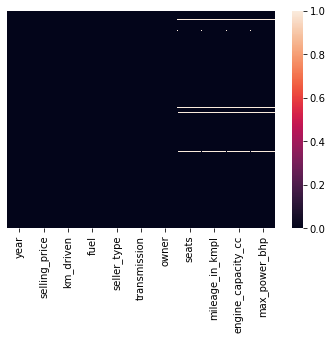

In [23]:
sns.heatmap(data.isnull(), yticklabels=False);

In [24]:
#Replacing null values with mean
for i in data.select_dtypes(include='number').columns:
    data[i] = data[i].fillna(data[i].mean())

In [25]:
data.isnull().sum()

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
mileage_in_kmpl       0
engine_capacity_cc    0
max_power_bhp         0
dtype: int64

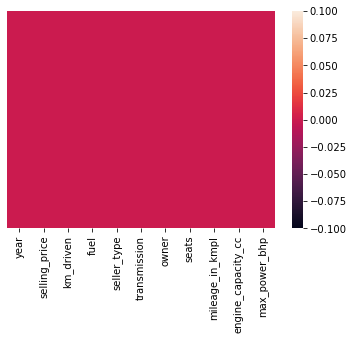

In [26]:
sns.heatmap(data.isnull(), yticklabels=False);

In [27]:
# Dulpicate records
data.duplicated().sum()

1221

In [28]:
# duplicated values percentage
print((1221/8128)*100)

15.022145669291339


In [29]:
# Removing duplicated records
data.drop_duplicates(inplace=True)

In [30]:
data = data.reset_index(drop=True)

In [31]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_in_kmpl,engine_capacity_cc,max_power_bhp
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20


In [32]:
data['car_years']=2022-data['year']

In [33]:
data.drop(labels=['year'], axis = 1, inplace=True)


In [34]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [35]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [36]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [37]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [38]:
data.fuel.replace(regex={"Diesel":0,"Petrol":1,"LPG":2,"CNG":3},inplace=True)
data.owner.replace(regex={"Test Drive Car":0,"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4},inplace=True)
data.transmission.replace(regex={"Manual":0,"Automatic":1},inplace=True)
data.seller_type.replace(regex={"Individual":0,"Dealer":1,"Trustmark Dealer":2},inplace=True)

In [39]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_in_kmpl,engine_capacity_cc,max_power_bhp,car_years
0,450000,145500,0,0,0,1,5.0,23.40,1248.0,74.00,8
1,370000,120000,0,0,0,2,5.0,21.14,1498.0,103.52,8
2,158000,140000,1,0,0,3,5.0,17.70,1497.0,78.00,16
3,225000,127000,0,0,0,1,5.0,23.00,1396.0,90.00,12
4,130000,120000,1,0,0,1,5.0,16.10,1298.0,88.20,15


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907 entries, 0 to 6906
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   selling_price       6907 non-null   int64  
 1   km_driven           6907 non-null   int64  
 2   fuel                6907 non-null   int64  
 3   seller_type         6907 non-null   int64  
 4   transmission        6907 non-null   int64  
 5   owner               6907 non-null   int64  
 6   seats               6907 non-null   float64
 7   mileage_in_kmpl     6907 non-null   float64
 8   engine_capacity_cc  6907 non-null   float64
 9   max_power_bhp       6907 non-null   float64
 10  car_years           6907 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 593.7 KB


In [41]:
# outliers
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_in_kmpl,engine_capacity_cc,max_power_bhp,car_years
count,6.907000e+03,6.907000e+03,6907.000000,6907.000000,6907.000000,6907.000000,6907.000000,6907.000000,6907.000000,6907.000000,6907.000000
mean,5.174456e+05,7.400715e+04,0.479224,0.102505,0.084552,1.513247,5.433861,19.575820,1431.877806,87.860463,8.583321
std,5.203562e+05,5.836081e+04,0.556114,0.303333,0.278234,0.743885,0.969561,4.217264,485.901750,31.314519,4.080794
min,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,624.000000,0.000000,2.000000
1%,5.012000e+04,5.000000e+03,0.000000,0.000000,0.000000,1.000000,4.000000,11.360000,796.000000,37.000000,3.000000
5%,1.000000e+05,1.200000e+04,0.000000,0.000000,0.000000,1.000000,5.000000,12.900000,796.000000,47.300000,3.000000
10%,1.450000e+05,2.000000e+04,0.000000,0.000000,0.000000,1.000000,5.000000,14.000000,993.000000,57.600000,4.000000
25%,2.500000e+05,4.000000e+04,0.000000,0.000000,0.000000,1.000000,5.000000,17.000000,1197.000000,68.000000,5.000000
50%,4.000000e+05,7.000000e+04,0.000000,0.000000,0.000000,1.000000,5.000000,19.516468,1248.000000,81.860000,8.000000
75%,6.345000e+05,1.000000e+05,1.000000,0.000000,0.000000,2.000000,5.000000,22.320000,1498.000000,99.000000,11.000000


In [42]:
# outliers
 

In [43]:
# Extreme outliers
IQR = data['max_power_bhp'].quantile(0.75)-data['max_power_bhp'].quantile(0.25)
lower_limit=data['max_power_bhp'].quantile(0.25)-(IQR*3)
upper_limit=data['max_power_bhp'].quantile(0.75)+(IQR*3)
print('Lower limit is {} and Upper limit is {}'.format(lower_limit,upper_limit))

Lower limit is -25.0 and Upper limit is 192.0


In [44]:
max_power_bhp_upper_outliers = (data['max_power_bhp'] > 145.5).sum()
max_power_bhp_lower_outliers = (data['max_power_bhp'] < 21.5).sum()
print(max_power_bhp_upper_outliers),print(max_power_bhp_lower_outliers)

371
3


(None, None)

In [45]:
data.loc[data['max_power_bhp']>145.5,'max_power_bhp']=145.5
data.loc[data['max_power_bhp']<21.5,'max_power_bhp']=21.5

In [46]:
print((data['max_power_bhp'] > 145.5).sum())
print((data['max_power_bhp'] < 21.5).sum())

0
0


In [47]:
IQR = data['km_driven'].quantile(0.75)-data['km_driven'].quantile(0.25)
lower_limit=data['km_driven'].quantile(0.25)-(IQR*3)
upper_limit=data['km_driven'].quantile(0.75)+(IQR*3)
print('Lower limit is {} and Upper limit is {}'.format(lower_limit,upper_limit))

Lower limit is -140000.0 and Upper limit is 280000.0


In [48]:
(data['km_driven'] > 280000).sum()

32

In [49]:
data.loc[data['km_driven']>280000,'km_driven']=280000

In [50]:
IQR = data['mileage_in_kmpl'].quantile(0.75)-data['mileage_in_kmpl'].quantile(0.25)
lower_limit=data['mileage_in_kmpl'].quantile(0.25)-(IQR*3)
upper_limit=data['mileage_in_kmpl'].quantile(0.75)+(IQR*3)
print('Lower limit is {} and Upper limit is {}'.format(lower_limit,upper_limit))

Lower limit is 1.0399999999999991 and Upper limit is 38.28


In [51]:
(data['mileage_in_kmpl'] > 38.28).sum()

8

In [52]:
data.loc[data['mileage_in_kmpl']>38.28,'mileage_in_kmpl']=38.28

In [53]:
IQR = data['engine_capacity_cc'].quantile(0.75)-data['engine_capacity_cc'].quantile(0.25)
lower_limit=data['engine_capacity_cc'].quantile(0.25)-(IQR*3)
upper_limit=data['engine_capacity_cc'].quantile(0.75)+(IQR*3)
print('Lower limit is {} and Upper limit is {}'.format(lower_limit,upper_limit))

Lower limit is 294.0 and Upper limit is 2401.0


In [54]:
(data['engine_capacity_cc'] > 2401.0).sum()

575

In [55]:
(data['engine_capacity_cc'] < 294.0).sum()

0

In [56]:
data.loc[data['engine_capacity_cc']>2401.0,'engine_capacity_cc']=2401.0

In [57]:
IQR = data['car_years'].quantile(0.75)-data['car_years'].quantile(0.25)
lower_limit=data['car_years'].quantile(0.25)-(IQR*3)
upper_limit=data['car_years'].quantile(0.75)+(IQR*3)
print('Lower limit is {} and Upper limit is {}'.format(lower_limit,upper_limit))

Lower limit is -13.0 and Upper limit is 29.0


In [58]:
(data['car_years'] > 29.0).sum()

2

In [59]:
data.loc[data['car_years']>29.0,'car_years']=29.0

In [60]:
IQR = data['selling_price'].quantile(0.75)-data['selling_price'].quantile(0.25)
lower_limit=data['selling_price'].quantile(0.25)-(IQR*3)
upper_limit=data['selling_price'].quantile(0.75)+(IQR*3)
print('Lower limit is {} and Upper limit is {}'.format(lower_limit,upper_limit))

Lower limit is -903500.0 and Upper limit is 1788000.0


In [61]:
(data['selling_price'] > 1788000.0).sum()

156

In [62]:
data.loc[data['selling_price']>1788000.0,'selling_price']=1788000.0

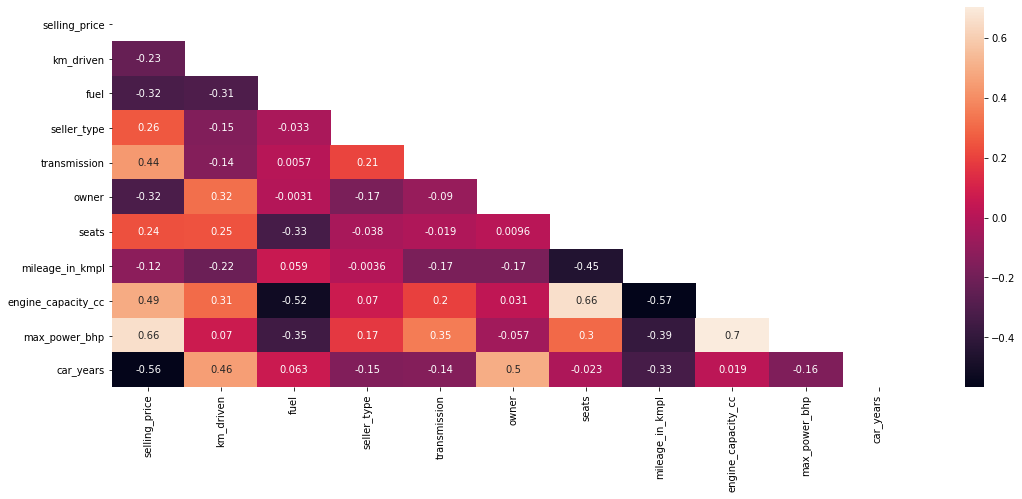

In [63]:
# Corelation of features
plt.figure(figsize=(18, 7))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

In [64]:
# categorical features in the data
#cat_feat =data.select_dtypes(include='object')
#cat_feat

In [65]:
# Numerical features in the data
num_feat =data.select_dtypes(include='number')
num_feat

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_in_kmpl,engine_capacity_cc,max_power_bhp,car_years
0,450000,145500,0,0,0,1,5.0,23.40,1248.0,74.00,8
1,370000,120000,0,0,0,2,5.0,21.14,1498.0,103.52,8
2,158000,140000,1,0,0,3,5.0,17.70,1497.0,78.00,16
3,225000,127000,0,0,0,1,5.0,23.00,1396.0,90.00,12
4,130000,120000,1,0,0,1,5.0,16.10,1298.0,88.20,15
...,...,...,...,...,...,...,...,...,...,...,...
6902,260000,50000,1,0,0,2,5.0,18.90,998.0,67.10,9
6903,475000,80000,0,0,0,2,5.0,22.54,1396.0,88.73,8
6904,320000,110000,1,0,0,1,5.0,18.50,1197.0,82.85,9
6905,135000,119000,0,0,0,4,5.0,16.80,1493.0,110.00,15


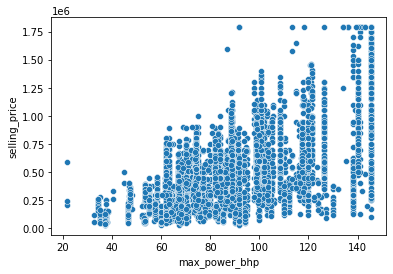

In [66]:
sns.scatterplot(data=data, x="max_power_bhp", y="selling_price");

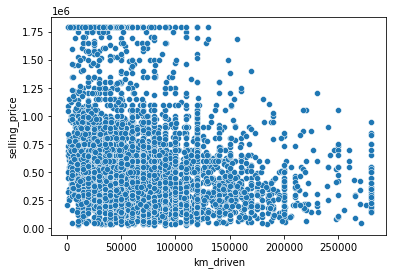

In [67]:
 sns.scatterplot(data=data, x="km_driven", y="selling_price");

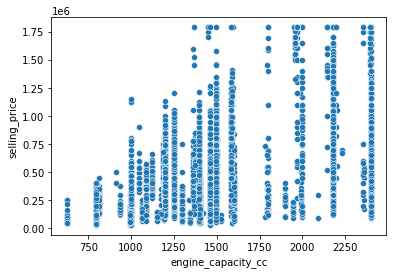

In [68]:
sns.scatterplot(data=data, x="engine_capacity_cc", y="selling_price");

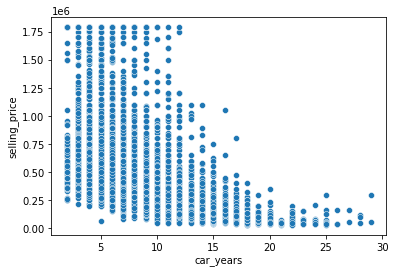

In [69]:
sns.scatterplot(data=data, x="car_years", y="selling_price");

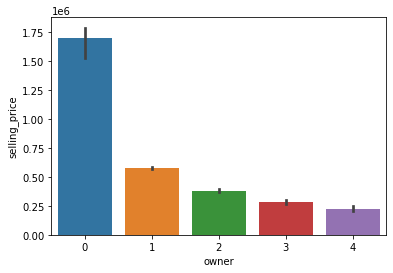

In [70]:
sns.barplot(x="owner", y="selling_price",data=data);

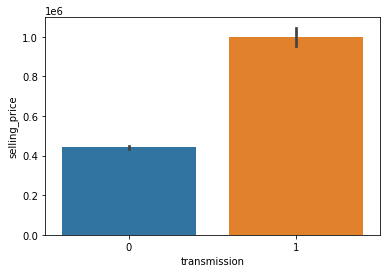

In [71]:
sns.barplot(x="transmission", y="selling_price",data=data);

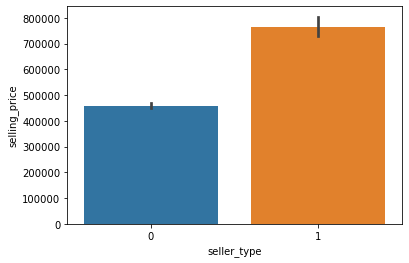

In [72]:
sns.barplot(x="seller_type", y="selling_price",data=data);

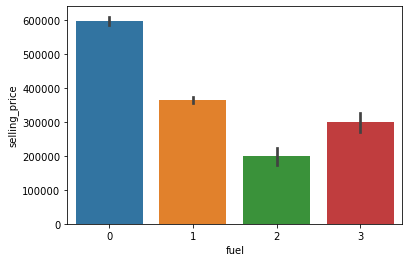

In [73]:
sns.barplot(x="fuel", y="selling_price",data=data);

In [74]:
x=data.drop('selling_price',axis=1)
y=data['selling_price']

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [141]:
#ohe=OneHotEncoder()
#ohe.fit(x[['fuel','seller_type','transmission','owner']])

In [142]:
#column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories),['fuel','seller_type','transmission','owner']),remainder='passthrough')

In [143]:
model=LinearRegression()

In [144]:
#model=make_pipeline(column_trans,lr)

In [145]:
model.fit(x_train,y_train)

LinearRegression()

In [146]:
y_pred=model.predict(x_test)
y_pred

array([ 608801.77381223, 1040854.30591837,  -21703.39662336, ...,
        573545.07363377,   90081.49367352,  535851.76431116])

In [147]:
model.coef_

array([-9.66028327e-01, -7.02311903e+04,  6.04283959e+04,  2.32462178e+05,
       -2.47595409e+04,  1.52264004e+03,  1.04989871e+03,  1.47464965e+02,
        5.07897160e+03, -3.21516904e+04])

In [148]:
model.intercept_

206787.15140789544

In [149]:
model.score(x_train,y_train)

0.7232202730315184

In [150]:
r2_score(y_test,y_pred)

0.7196531315212837

In [151]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [152]:
scores

[0.7205748961770679,
 0.7166590430673074,
 0.7289259939347787,
 0.7259379040845478,
 0.73409302494465,
 0.716992624081705,
 0.7225431405077827,
 0.7268178229164707,
 0.7286376828253045,
 0.7256136814776343,
 0.7388130378988723,
 0.7370809981164292,
 0.7009863114293009,
 0.7366004404834403,
 0.7114976212512811,
 0.7346422245288771,
 0.7329882677303876,
 0.7341696460408857,
 0.716057530099087,
 0.7272354558335162,
 0.7261716154898885,
 0.7343637406473333,
 0.7126507867343334,
 0.7213379434186808,
 0.7250164512496646,
 0.7050281871286508,
 0.7145825611404995,
 0.714228665167297,
 0.7132210150120895,
 0.717629201724647,
 0.7141548401560764,
 0.7294135400871171,
 0.7195976605907312,
 0.7385890870448883,
 0.7181771767820546,
 0.7241830756637335,
 0.7115181484796205,
 0.7113388660975237,
 0.7035528409409091,
 0.7345666162387923,
 0.7311304912402954,
 0.7316478366238328,
 0.7070035195574587,
 0.723918030222023,
 0.7196471005610348,
 0.7251486720471297,
 0.7257303623720379,
 0.7104798202018829,

In [153]:
np.argmax(scores)

991

In [154]:
scores[np.argmax(scores)]

0.7513423961630701

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=np.argmax(scores))
lr=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.7416467456631669

# with cross validation

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

In [157]:
reg = LinearRegression()
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_validation_score = cross_val_score(reg, x_train, y_train, scoring='r2', cv = k_fold)
print(cross_validation_score)

[0.75482055 0.68727497 0.68364341 0.70344666 0.69532946 0.69293862
 0.71888272 0.71736132 0.71166397 0.72864741]


In [158]:
cross_validation_score.mean()

0.7094009089431722

# Hyper parameters tuning

In [159]:
from sklearn.model_selection import GridSearchCV
k_folds = KFold(n_splits=10, shuffle=True, random_state=1)

hyper_parameters = [{'n_features_to_select':list(range(1, 15))}]

reg = LinearRegression()
reg.fit(x_train, y_train)
reg = RFE(reg)

model = GridSearchCV(estimator=reg, param_grid=hyper_parameters, verbose=1, cv=k_folds,
                    scoring='r2', return_train_score=True)

In [160]:
model.fit(x_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [161]:
model.best_params_

{'n_features_to_select': 10}

In [162]:
model.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [163]:
model.best_score_

0.7094009089431722

In [164]:
reg.get_params()

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'importance_getter': 'auto',
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0}

In [165]:
results= pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.017464,0.003095,0.002534,0.003593,1,{'n_features_to_select': 1},0.181179,0.184707,0.129512,0.147122,...,0.175869,0.173854,0.173679,0.172795,0.172942,0.165688,0.168520,0.170139,0.171321,0.002876
1,0.015660,0.007899,0.003378,0.006521,2,{'n_features_to_select': 2},0.272546,0.295792,0.234350,0.258074,...,0.279710,0.277013,0.280497,0.278075,0.273135,0.268066,0.271957,0.276023,0.275272,0.003629
2,0.016241,0.006589,0.001771,0.004988,3,{'n_features_to_select': 3},0.296578,0.330036,0.264138,0.281458,...,0.304616,0.302672,0.305216,0.303469,0.298751,0.294872,0.298210,0.300795,0.300685,0.003206
3,0.017830,0.001222,0.003632,0.006218,4,{'n_features_to_select': 4},0.325924,0.327472,0.311648,0.302730,...,0.327854,0.328852,0.330223,0.329183,0.321428,0.321464,0.326574,0.326439,0.326432,0.002824
4,0.012967,0.007442,0.002653,0.005167,5,{'n_features_to_select': 5},0.534095,0.537141,0.520050,0.545554,...,0.553086,0.550229,0.549629,0.553129,0.546826,0.548136,0.546299,0.549314,0.549928,0.002252
5,0.008917,0.007013,0.002066,0.004815,6,{'n_features_to_select': 6},0.536724,0.539117,0.521583,0.548281,...,0.554711,0.551714,0.551168,0.554993,0.548497,0.549727,0.547745,0.551187,0.551545,0.002296
6,0.015293,0.005270,0.001068,0.003203,7,{'n_features_to_select': 7},0.738117,0.671706,0.669236,0.686371,...,0.698416,0.696432,0.696018,0.698571,0.694974,0.694812,0.695331,0.692820,0.695612,0.002408
7,0.010014,0.006140,0.002733,0.005056,8,{'n_features_to_select': 8},0.744384,0.672785,0.669974,0.686557,...,0.699304,0.697370,0.696939,0.699462,0.695829,0.695858,0.696350,0.699188,0.697590,0.001416
8,0.007876,0.007963,0.006093,0.006307,9,{'n_features_to_select': 9},0.744435,0.677525,0.682765,0.686583,...,0.703597,0.703065,0.702695,0.703645,0.700771,0.701332,0.701669,0.699188,0.701679,0.002233
9,0.006925,0.007050,0.000464,0.001083,10,{'n_features_to_select': 10},0.754821,0.687275,0.683643,0.703447,...,0.714994,0.712730,0.713491,0.714099,0.711059,0.711217,0.711823,0.709542,0.712064,0.002364


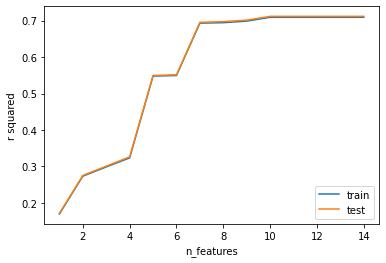

In [166]:
plt.plot(results['param_n_features_to_select'], results['mean_test_score'])
plt.plot(results['param_n_features_to_select'], results['mean_train_score'])
plt.xlabel('n_features')
plt.ylabel('r squared')
plt.legend([('train'), ('test')], loc = 'lower right')

In [167]:
reg = LinearRegression()
reg.fit(x_train, y_train)

final_model = RFE(reg, n_features_to_select=7)
final_model.fit(x_train, y_train)

y_preds = final_model.predict(x_test)
score = r2_score(y_test, y_preds)
print('R Squared :', score)


R Squared : 0.7273443573529865


In [168]:
y_preds

array([802780.2518849 , 981864.09683793, 681768.4085899 , ...,
        -8357.08874633, 711210.39888928,  14561.39642571])